1. Choose a model
2. Choose a loss function
3. Fit the model
4. Evaluate model performance

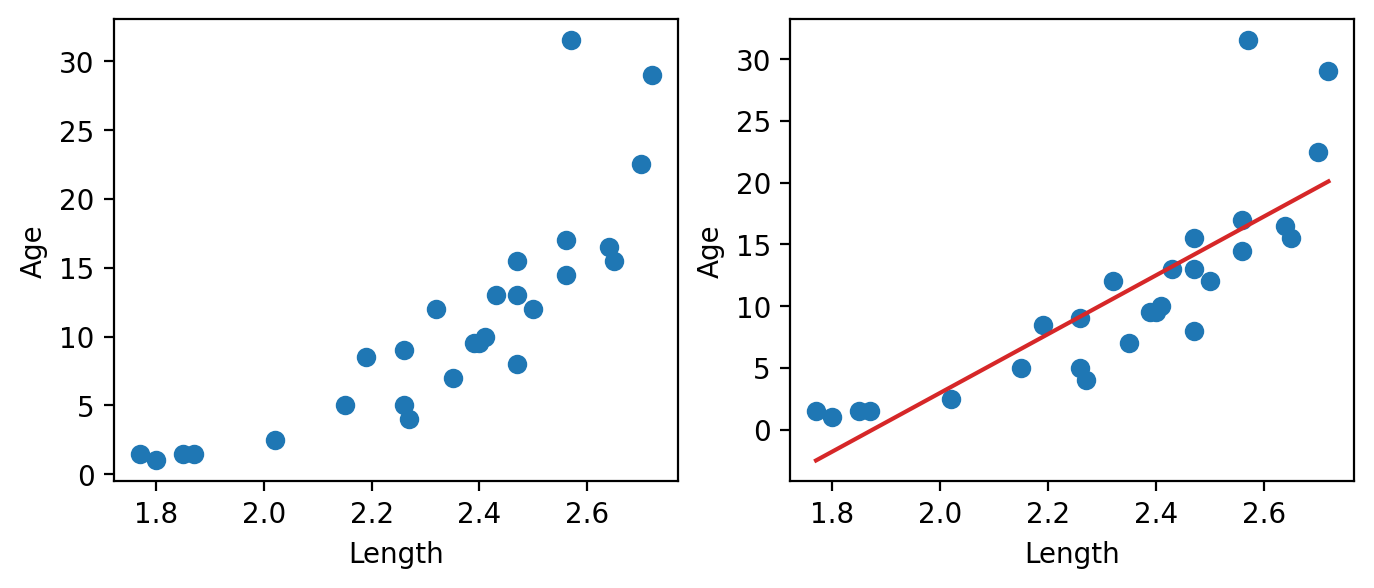

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dugong = pd.read_csv("/Users/jordan.arlan/Documents/DS100/Data/dugong.csv", delimiter=",").sort_values("Length")
x, y = dugong["Length"], dugong["Age"]

# `corrcoef` computes the correlation coefficient between two variables
# `std` finds the standard deviation
r = np.corrcoef(x, y)[0, 1]
theta_1 = r*np.std(y)/np.std(x)
theta_0 = np.mean(y) - theta_1*np.mean(x)

fig, ax = plt.subplots(1, 2, dpi=200, figsize=(8, 3))
ax[0].scatter(x, y)
ax[0].set_xlabel("Length")
ax[0].set_ylabel("Age")

ax[1].scatter(x, y)
ax[1].plot(x, theta_0 + theta_1*x, "tab:red")
ax[1].set_xlabel("Length")
ax[1].set_ylabel("Age");

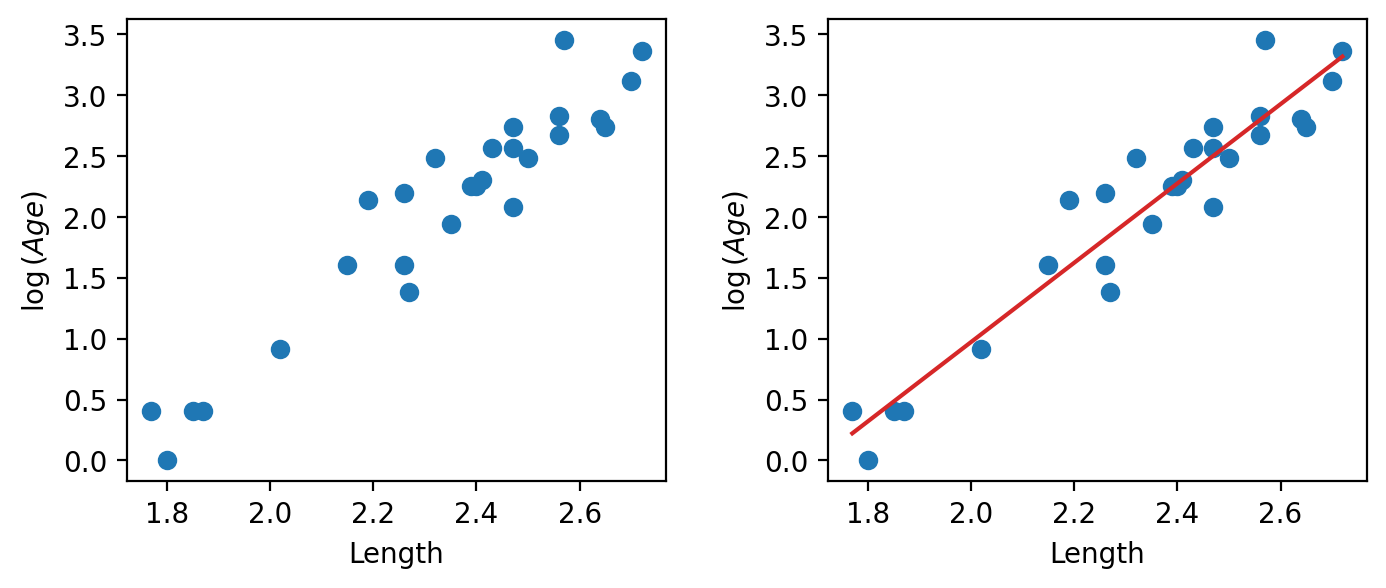

In [4]:
z = np.log(y)

r = np.corrcoef(x, z)[0, 1]
theta_1 = r*np.std(z)/np.std(x)
theta_0 = np.mean(z) - theta_1*np.mean(x)

fig, ax = plt.subplots(1, 2, dpi=200, figsize=(8, 3))
ax[0].scatter(x, z)
ax[0].set_xlabel("Length")
ax[0].set_ylabel(r"$\log{(Age)}$")

ax[1].scatter(x, z)
ax[1].plot(x, theta_0 + theta_1*x, "tab:red")
ax[1].set_xlabel("Length")
ax[1].set_ylabel(r"$\log{(Age)}$")

plt.subplots_adjust(wspace=0.3);

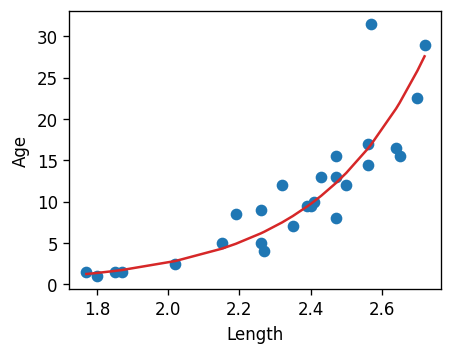

In [5]:
plt.figure(dpi=120, figsize=(4, 3))

plt.scatter(x, y)
plt.plot(x, np.exp(theta_0)*np.exp(theta_1*x), "tab:red")
plt.xlabel("Length")
plt.ylabel("Age");

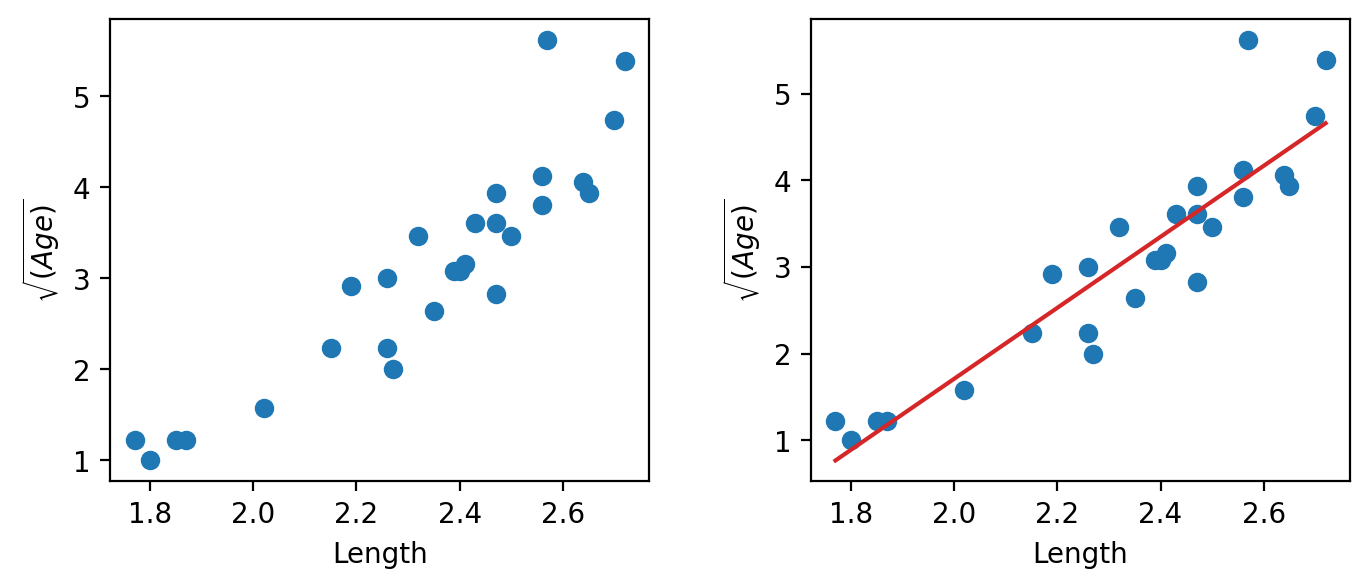

In [6]:
z = np.sqrt(y)

r = np.corrcoef(x, z)[0, 1]
theta_1 = r*np.std(z)/np.std(x)
theta_0 = np.mean(z) - theta_1*np.mean(x)

fig, ax = plt.subplots(1, 2, dpi=200, figsize=(8, 3))
ax[0].scatter(x, z)
ax[0].set_xlabel("Length")
ax[0].set_ylabel(r"$\sqrt{(Age)}$")

ax[1].scatter(x, z)
ax[1].plot(x, theta_0 + theta_1*x, "tab:red")
ax[1].set_xlabel("Length")
ax[1].set_ylabel(r"$\sqrt{(Age)}$")

plt.subplots_adjust(wspace=0.3);

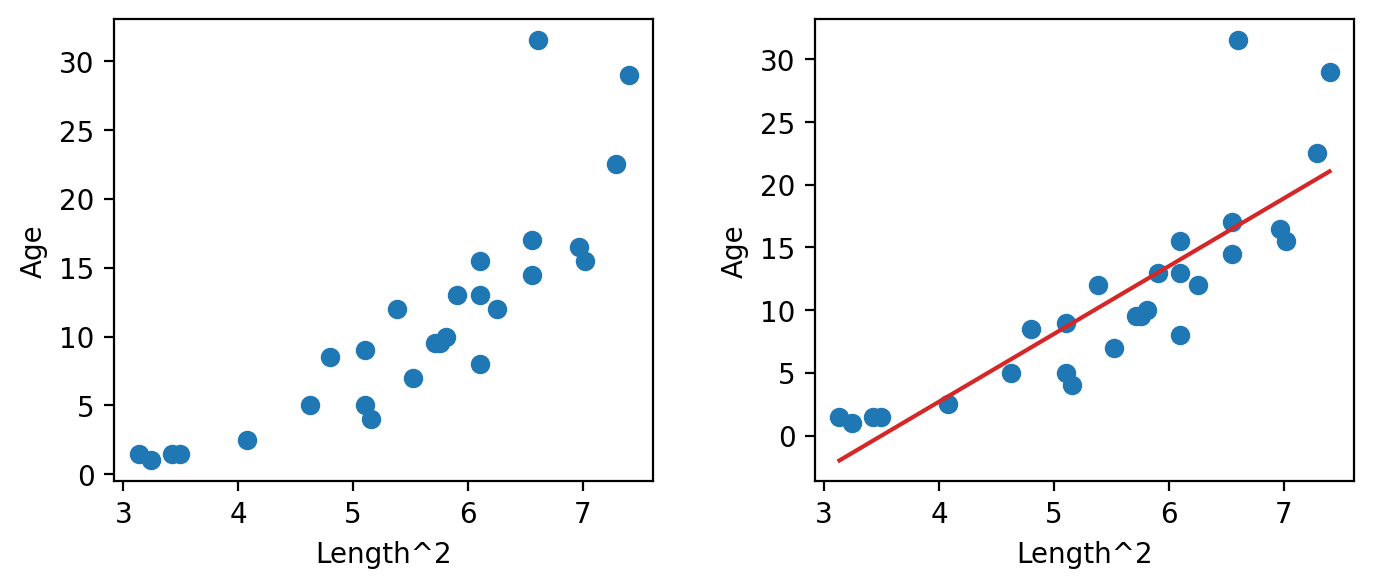

In [7]:
z = np.square(x)

r = np.corrcoef(z, y)[0, 1]
theta_1 = r*np.std(y)/np.std(z)
theta_0 = np.mean(y) - theta_1*np.mean(z)

fig, ax = plt.subplots(1, 2, dpi=200, figsize=(8, 3))
ax[0].scatter(z, y)
ax[0].set_xlabel(r"Length^2")
ax[0].set_ylabel(r"Age")

ax[1].scatter(z, y)
ax[1].plot(z, theta_0 + theta_1*z, "tab:red")
ax[1].set_xlabel(r"Length^2")
ax[1].set_ylabel(r"Age")

plt.subplots_adjust(wspace=0.3);

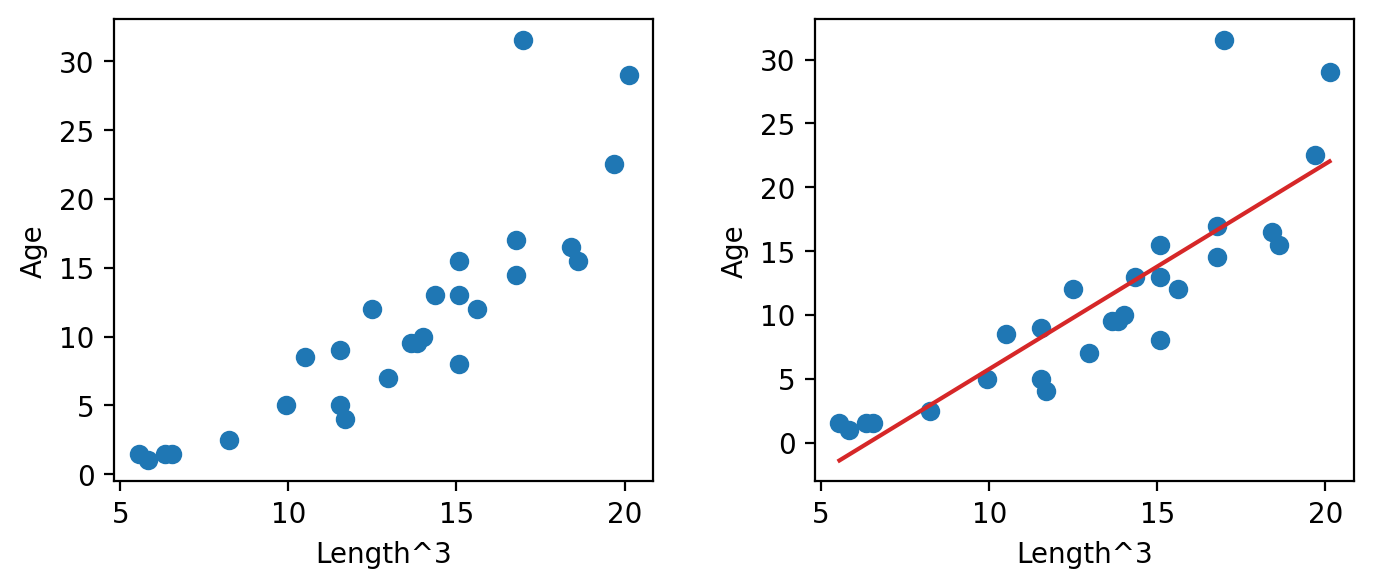

In [8]:
z = x**3

r = np.corrcoef(z, y)[0, 1]
theta_1 = r*np.std(y)/np.std(z)
theta_0 = np.mean(y) - theta_1*np.mean(z)

fig, ax = plt.subplots(1, 2, dpi=200, figsize=(8, 3))
ax[0].scatter(z, y)
ax[0].set_xlabel(r"Length^3")
ax[0].set_ylabel(r"Age")

ax[1].scatter(z, y)
ax[1].plot(z, theta_0 + theta_1*z, "tab:red")
ax[1].set_xlabel(r"Length^3")
ax[1].set_ylabel(r"Age")

plt.subplots_adjust(wspace=0.3);

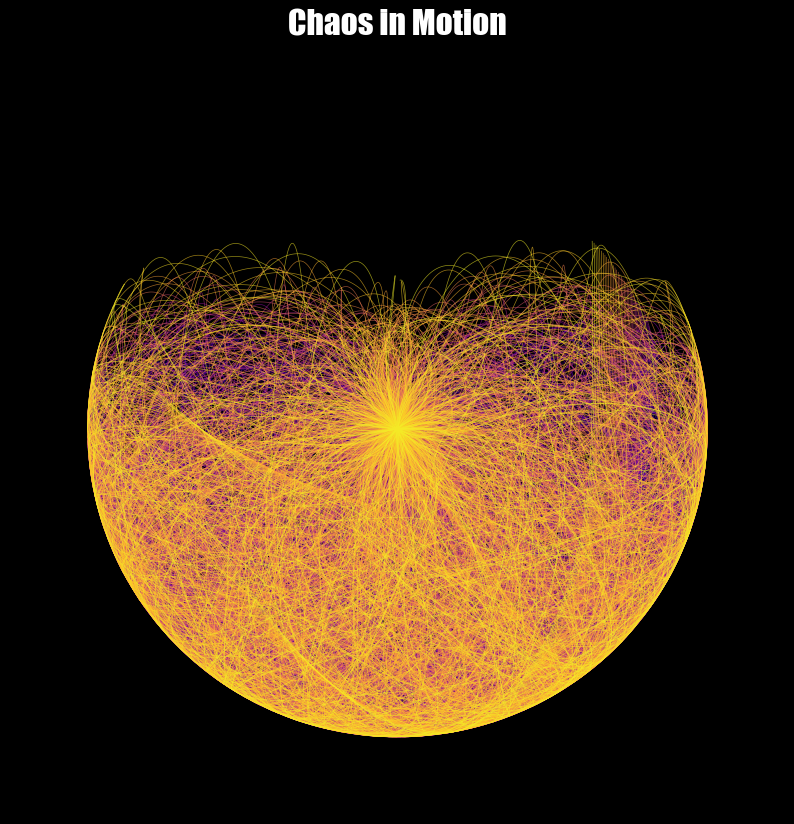

In [9]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
G = 9.8  # gravity
L1 = 1.0  # length of pendulum 1
L2 = 1.0  # length of pendulum 2
M1 = 1.0  # mass of pendulum 1
M2 = 1.0  # mass of pendulum 2


# Initial conditions: theta1, dtheta1/dt, theta2, dtheta2/dt.
Y0 = [3*np.pi/7, 0, 3*np.pi/4, 0]

def equations(Y, t):
    theta1, z1, theta2, z2 = Y
    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)
    theta1_dot = z1
    z1_dot = (M2*G*np.sin(theta2)*c - M2*s*(L1*z1**2*c + L2*z2**2) - (M1+M2)*G*np.sin(theta1)) / L1 / (M1 + M2*s**2)
    theta2_dot = z2
    z2_dot = ((M1+M2)*(L1*z1**2*s - G*np.sin(theta2) + G*np.sin(theta1)*c) + M2*L2*z2**2*s*c) / L2 / (M1 + M2*s**2)
    return theta1_dot, z1_dot, theta2_dot, z2_dot


# Time array
t = np.linspace(0, 50, 5000)

# Integrate the ODE using scipy.integrate.
Y = odeint(equations, Y0, t)

# Extract theta values from the solution
theta1, theta2 = Y[:,0], Y[:,2]

# Convert theta to x, y coordinates
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

# Create a color map to represent time
colors = plt.cm.viridis(np.linspace(0, 1, len(x2)))

# Define a function to calculate the pendulum path
def calculate_path(Y0):
    # Integrate the ODE using scipy.integrate.
    Y = odeint(equations, Y0, t)

    # Extract theta values from the solution
    theta1, theta2 = Y[:,0], Y[:,2]

    # Convert theta to x, y coordinates
    x1 = L1 * np.sin(theta1)
    y1 = -L1 * np.cos(theta1)
    x2 = x1 + L2 * np.sin(theta2)
    y2 = y1 - L2 * np.cos(theta2)

    return x2, y2

# Time array
t = np.linspace(0, 50, 5000)

# Create a new figure and axis, with a black background
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('black')

# Simulate and plot the paths of multiple pendulums with slightly different initial conditions
for i in range(50):
    # Initial conditions: theta1, dtheta1/dt, theta2, dtheta2/dt.
    Y0 = [3*np.pi/7 + 0.01*i, 0, 3*np.pi/4 + 0.01*i, 0]
    x2, y2 = calculate_path(Y0)

    # Use the plasma color map for more contrast
    color = plt.cm.plasma(i / 50)

    # Plot the path of the pendulum with the color
    ax.plot(x2, y2, color=color, alpha=0.6, linewidth=0.5)

# Set the plot title with a specific font
plt.title('Chaos in Motion', color='white', fontsize=24, fontname='fantasy')

# Set the plot limits
plt.xlim([-2.5, 2.5])
plt.ylim([-2.5, 2.5])

# Add a subtle grid
ax.grid(True, linestyle='-', color='white', alpha=0.1)

# Remove labels and set the ticks color to white
ax.axis('off')
ax.tick_params(colors='white')

plt.show()


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# Big font helper
def adjust_fontsize(size=None):
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12
    if size != None:
        SMALL_SIZE = MEDIUM_SIZE = BIGGER_SIZE = size

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

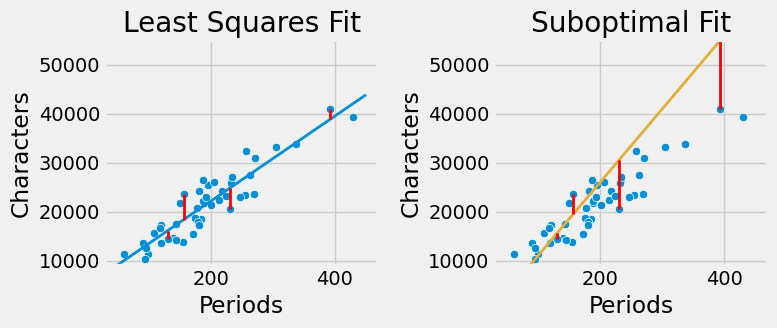

In [11]:
plt.style.use('fivethirtyeight')
%matplotlib inline
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 

use_good = False

lw_df = pd.read_csv("/Users/jordan.arlan/Documents/DS100/Data/little_women.csv")

linear_fits = [
    #    a,   b,     label,    color
    ( 4745,  87,  "Least Squares Fit", colors[0]),
    (-4000, 150,  "Suboptimal Fit", colors[2]),
    #(50000, -50, "Bad Fit", colors[3])
]

# Create 2 subplots stacked into 2 columns (i.e. 1 x 2)
nplots = len(linear_fits)
fig, axs = plt.subplots(1, nplots, figsize=(4*nplots, 3.5))
for i in range(nplots):
    ax = axs[i]
    a, b, label, color = linear_fits[i]
    
    # Plot data and line
    sns.scatterplot(data=lw_df, x="Periods", y="Characters", ax=ax)
    xlims = np.array([50, 450])
    ax.plot(xlims, a + b * xlims, lw=2, label=label, c=color)

    # Plot residuals for some points
    sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
    for x, y in sample:
        yhat = a + b*x
        ax.plot([x, x], [y, yhat], color='r', lw=2)
    ax.set_title(label)
    ax.set_ylim((9000, 55000))
fig.tight_layout()

## Comparing Two Different Models, Both Fit with MSE

In [12]:
dugongs = pd.read_csv("/Users/jordan.arlan/Documents/DS100/Data/dugong.csv")
data_constant = dugongs["Age"]
data_linear = dugongs[["Length", "Age"]]

### Loss Surfaces
#### Computes constant loss surface 

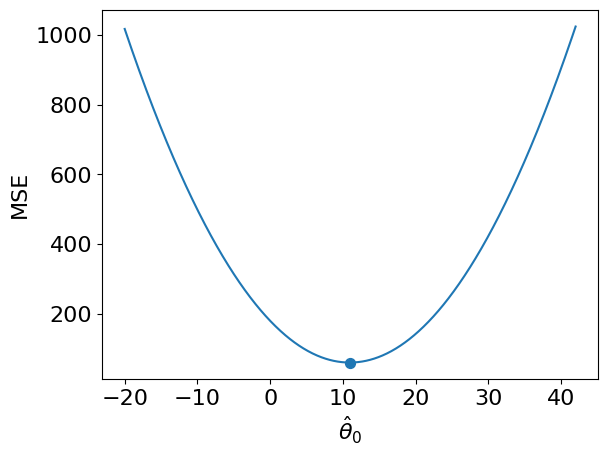

In [13]:
plt.style.use('default') # Revert style to default mpl
adjust_fontsize(size=16)
%matplotlib inline

def mse_constant(theta, data):
    return np.mean(np.array([(y_obs - theta) ** 2 for y_obs in data]), axis=0)

thetas = np.linspace(-20, 42, 1000)
l2_loss_thetas = mse_constant(thetas, data_constant)

plt.plot(thetas, l2_loss_thetas)
plt.xlabel(r'$\hat{\theta}_0$')
plt.ylabel(r'MSE')

# Optimal point
thetahat = np.mean(data_constant)
plt.scatter([thetahat], [mse_constant(thetahat, data_constant)], s=50)
# plt.savefig('mse_constant_loss.png', bbox_inches = 'tight');
plt.show()

In [14]:
# Importing the necessary libraries
import itertools
import plotly.graph_objects as go

# Define the Mean Squared Error (MSE) function for a linear model
def mse_linear(theta_0, theta_1, data_linear):
    # Extract x and y data
    data_x, data_y = data_linear.iloc[:,0], data_linear.iloc[:,1]
    # Calculate the mean squared error
    return np.mean(np.array([(y - (theta_0+theta_1*x)) ** 2 for x, y in zip(data_x, data_y)]), axis=0)

# Generate a range of values for theta_0 and theta_1
theta_0_values = np.linspace(-80, 20, 80)
theta_1_values = np.linspace(-10,30, 80)
# Calculate the mean squared error for all combinations of theta_0 and theta_1
mse_values = [mse_linear(theta_0, theta_1, data_linear) for theta_0, theta_1 in itertools.product(theta_0_values, theta_1_values)]
# Reshape the mse_values to a matrix
mse_values = np.reshape(mse_values, (len(theta_0_values), len(theta_1_values)), order='F')

# Calculate the optimal theta_0 (intercept) and theta_1 (slope) using correlation and standard deviation
data_x, data_y = data_linear.iloc[:,0], data_linear.iloc[:,1]
theta_1_hat = np.corrcoef(data_x, data_y)[0, 1] * np.std(data_y) / np.std(data_x)
theta_0_hat = np.mean(data_y) - theta_1_hat * np.mean(data_x)

# Create a 3D plot
fig_lin = go.Figure(data=[go.Surface(x=theta_0_values, y=theta_1_values, z=mse_values,name='z=loss')])
# Add the optimal point to the plot
fig_lin.add_trace(go.Scatter3d(x=[theta_0_hat], y=[theta_1_hat], z=[mse_linear(theta_0_hat, theta_1_hat, data_linear)], mode='markers', marker=dict(size=12),name='theta hat'))

# Update the layout of the plot
fig_lin.update_layout(
    title=r'MSE for different values of $theta_0, theta_1$',
    autosize=False,
    scene = dict(
                    xaxis_title='theta_0',
                    yaxis_title='theta_1',
                    zaxis_title='z=MSE'),
                    width=500,
                    margin=dict(r=20, b=10, l=10, t=10))

# Show the plot
fig_lin.show()


In [15]:
print("Least Squares Constant Model RMSE:",
          np.sqrt(mse_constant(thetahat, data_constant)))
print("Least Squares Linear Model RMSE:  ",
          np.sqrt(mse_linear(theta_0_hat, theta_1_hat, data_linear)))

Least Squares Constant Model RMSE: 7.722422059764398
Least Squares Linear Model RMSE:   4.311332860288156


In [16]:
yobs = data_linear["Age"]      # The true observations y
xs = data_linear["Length"]     # Needed for linear predictions
n = len(yobs)                  # Predictions

yhats_constant = [thetahat for i in range(n)]    # Not used, but food for thought
yhats_linear = [theta_0_hat + theta_1_hat * x for x in xs]

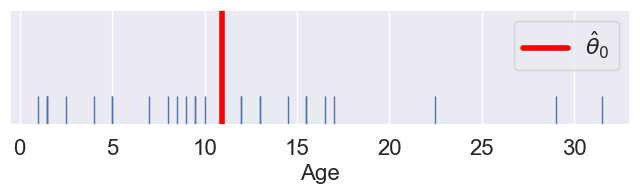

In [17]:
# In case we're in a weird style state
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

fig = plt.figure(figsize=(8, 1.5))
sns.rugplot(yobs, height=0.25, lw=2) ;
plt.axvline(thetahat, color='red', lw=4, label=r"$\hat{\theta}_0$");
plt.legend()
plt.yticks([])
# plt.savefig('dugong_rug.png', bbox_inches = 'tight');
plt.show()

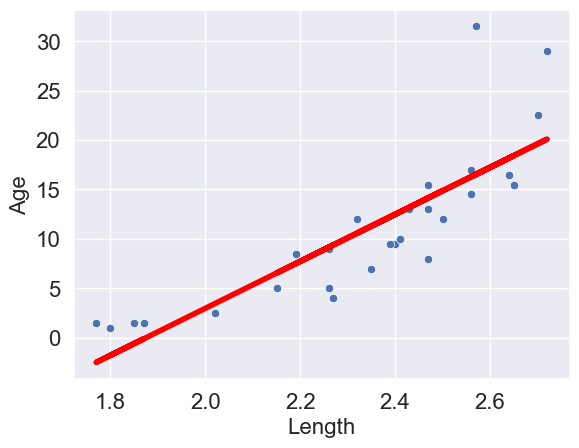

In [18]:
# In case we're in a weird style state
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, yhats_linear, color='red', lw=4)
# plt.savefig('dugong_line.png', bbox_inches = 'tight');
plt.show()

### Boba Tea: Two Constant Models, Fit to Different Losses
#### Exploring MAE

In [19]:
boba = np.array([20, 21, 22, 29, 33])
thetas = np.linspace(10, 30, 1000)
l1_loss_single_obvs = np.abs(boba[0] - thetas)

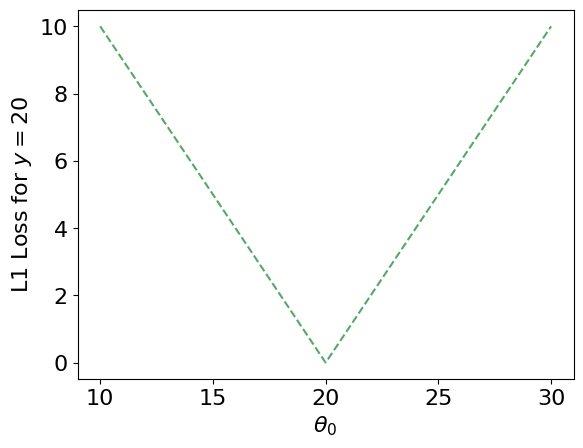

In [20]:
plt.style.use('default') # Revert style to default mpl
adjust_fontsize(size=16)
%matplotlib inline

plt.plot(thetas, l1_loss_single_obvs,  'g--', );
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'L1 Loss for $y = 20$');
# plt.savefig('l1_loss_single_obs.png', bbox_inches = 'tight');

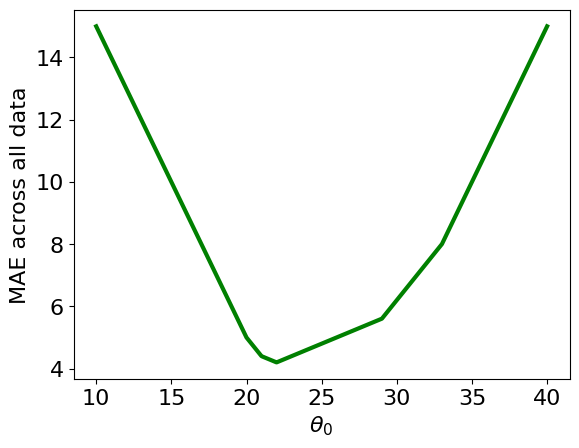

In [21]:
def mae_constant(theta_0, data):
    return np.mean(np.array([np.abs(y_obs - theta_0) for y_obs in data]), axis=0)

thetas = np.linspace(10, 40, 1000)
l1_loss_thetas = mae_constant(thetas, boba)
plt.plot(thetas, l1_loss_thetas, color = 'green', lw=3);
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'MAE across all data');
# plt.savefig('l1_loss_average.png', bbox_inches = 'tight');

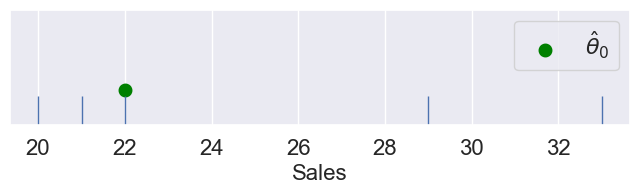

In [22]:
# In case we're in a weird style state
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

yobs = boba
thetahat = np.median(yobs)

fig = plt.figure(figsize=(8, 1.5))
sns.rugplot(yobs, height=0.25, lw=2) ;
plt.scatter([thetahat], [-.1], color='green', lw=4, label=r"$\hat{\theta}_0$");
plt.xlabel("Sales")
plt.legend()
plt.yticks([])
# plt.savefig('boba_rug.png', bbox_inches = 'tight');
plt.show()

In [23]:
plt.style.use('default') # Revert style to default mpl
adjust_fontsize(size=16)
%matplotlib inline


def plot_losses(data, title=None, theta_range=(10, 40)):
    thetas = np.linspace(theta_range[0], theta_range[1], 1000)
    l2_loss_thetas = mse_constant(thetas, data)
    thetahat_mse = np.mean(data)

    l1_loss_thetas = mae_constant(thetas, data)
    thetahat_mae = np.median(data)

    fig, axs = plt.subplots(1, nplots, figsize=(5*2+0.5, 3.5))
    axs[0].plot(thetas, l2_loss_thetas, lw=3);
    axs[0].scatter([thetahat_mse], [mse_constant(thetahat_mse, data)], s=100)
    axs[0].annotate(r"$\hat{\theta}_0$ = " + f"{thetahat_mse:.1f}",
                    xy=(thetahat_mse, np.average(axs[0].get_ylim())),
                    size=20, ha='center', va='top',
                    bbox=dict(boxstyle='round', fc='w'))
    axs[0].set_xlabel(r'$\theta_0$');
    axs[0].set_ylabel(r'MSE');

    axs[1].plot(thetas, l1_loss_thetas, color = 'green', lw=3);
    axs[1].scatter([thetahat_mae], [mae_constant(thetahat_mae, data)], color='green', s=100)
    axs[1].annotate(r"$\hat{\theta}_0$ = " + f"{thetahat_mae:.1f}",
                    xy=(thetahat_mae, np.average(axs[1].get_ylim())),
                    size=20, ha='center', va='top',
                    bbox=dict(boxstyle='round', fc='w'))
    axs[1].set_xlabel(r'$\theta_0$');
    axs[1].set_ylabel(r'MAE');
    if title:
        fig.suptitle(title)
    fig.tight_layout()
    return fig

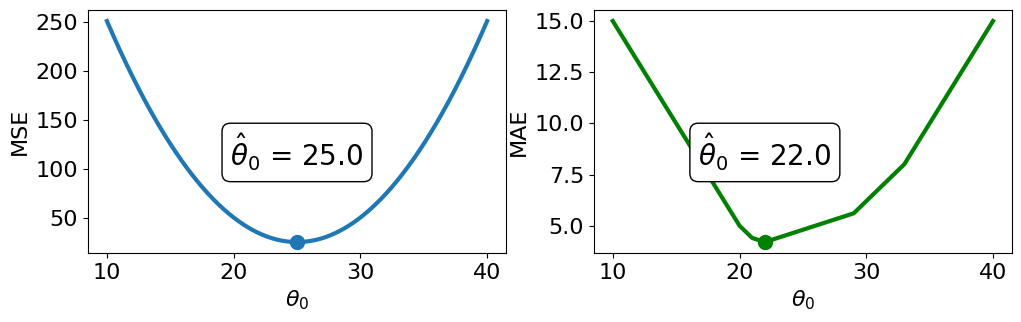

In [24]:
fig = plot_losses(boba)
plt.figure(fig)
# plt.savefig('loss_compare.png', bbox_inches = 'tight');
plt.show()

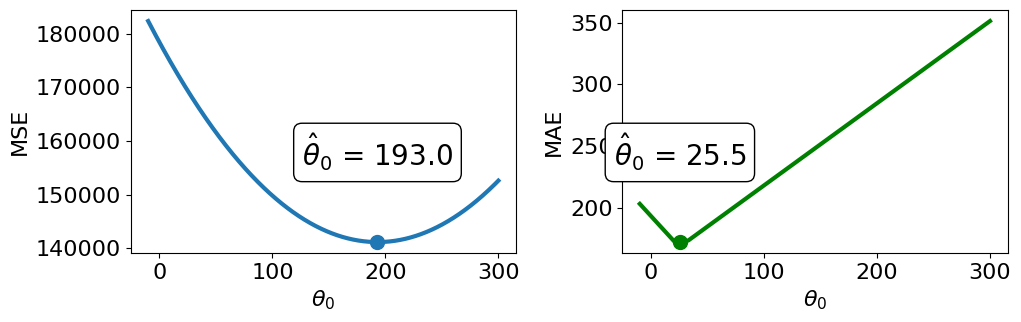

In [25]:
boba_outlier = np.array([20, 21, 22, 29, 33, 1033])
fig = plot_losses(boba_outlier, theta_range=[-10, 300])
plt.figure(fig)
# plt.savefig('loss_outlier.png', bbox_inches = 'tight');
plt.show()

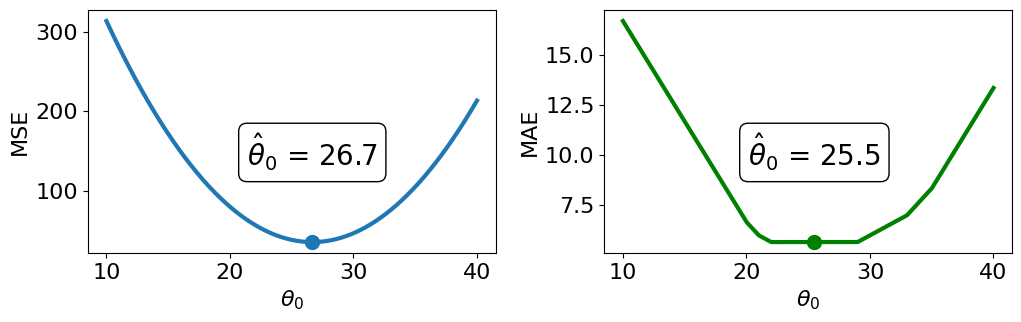

In [26]:
boba_even = np.array([20, 21, 22, 29, 33, 35])
fig = plot_losses(boba_even)
plt.figure(fig)
#plt.savefig('loss_unique.png', bbox_inches = 'tight');
plt.show()

In [27]:
boba_df = pd.DataFrame({"sales": [20, 21, 22, 29, 33],
                        "temps": [40, 44, 55, 70, 85]},
                       columns=["temps", "sales"])
boba_df

,temps,sales
0,40,20
1,44,21
2,55,22
3,70,29
4,85,33


In [28]:
# Just run this cell
import itertools
import plotly.graph_objects as go

data_linear = boba_df

def mAe_linear(theta_0, theta_1, data_linear):
    data_x, data_y = data_linear.iloc[:,0], data_linear.iloc[:,1]
    return np.mean(np.array([np.abs(y - (theta_0+theta_1*x)) for x, y in zip(data_x, data_y)]), axis=0)

theta_0_values = np.linspace(-20, 20, 80)
theta_1_values = np.linspace(-50, 50, 80)
mAe_values = [mAe_linear(theta_0, theta_1, data_linear) \
              for theta_0, theta_1 in itertools.product(theta_0_values, theta_1_values)]
mAe_values = np.reshape(mAe_values, (len(theta_0_values), len(theta_1_values)), order='F')

# Optimal point
fig_lin_mae = go.Figure(data=[go.Surface(x=theta_0_values, y=theta_1_values, z=mAe_values,name='z=loss')])

fig_lin_mae.update_layout(
    title=r'MAE for different values of $\theta_0, \theta_1$',
    autosize=False,
    scene = dict(
                    xaxis_title='x=theta_0',
                    yaxis_title='y=theta_1',
                    zaxis_title='z=MAE'),
                    width=500,
                    margin=dict(r=20, b=10, l=10, t=10))
fig_lin_mae.show()

In [29]:
# Helper functions
def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y))

def slope(x, y):
    return correlation(x, y) * np.std(y) / np.std(x)

def intercept(x, y):
    return np.mean(y) - slope(x, y)*np.mean(x)

def fit_least_squares(x, y):
    theta_0 = intercept(x, y)
    theta_1 = slope(x, y)
    return theta_0, theta_1

def predict(x, theta_0, theta_1):
    return theta_0 + theta_1*x

def compute_mse(y, yhat):
    return np.mean((y - yhat)**2)

In [31]:
plt.style.use('default') # Revert style to default mpl
NO_VIZ, RESID, RESID_SCATTER = range(3)
def least_squares_evaluation(x, y, visualize=NO_VIZ):
    # statistics
    print(f"x_mean : {np.mean(x):.2f}, y_mean : {np.mean(y):.2f}")
    print(f"x_stdev: {np.std(x):.2f}, y_stdev: {np.std(y):.2f}")
    print(f"r = Correlation(x, y): {correlation(x, y):.3f}")
    
    # Performance metrics
    ahat, bhat = fit_least_squares(x, y)
    yhat = predict(x, ahat, bhat)
    print(f"\theta_0: {ahat:.2f}, \theta_1: {bhat:.2f}")
    print(f"RMSE: {np.sqrt(compute_mse(y, yhat)):.3f}")

    # visualization
    fig, ax_resid = None, None
    if visualize == RESID_SCATTER:
        fig, axs = plt.subplots(1,2,figsize=(8, 3))
        axs[0].scatter(x, y)
        axs[0].plot(x, yhat)
        axs[0].set_title("LS fit")
        ax_resid = axs[1]
    elif visualize == RESID:
        fig = plt.figure(figsize=(4, 3))
        ax_resid = plt.gca()
    
    if ax_resid is not None:
        ax_resid.scatter(x, y - yhat, color = 'red')
        ax_resid.plot([4, 14], [0, 0], color = 'black')
        ax_resid.set_title("Residuals")
    
    return fig

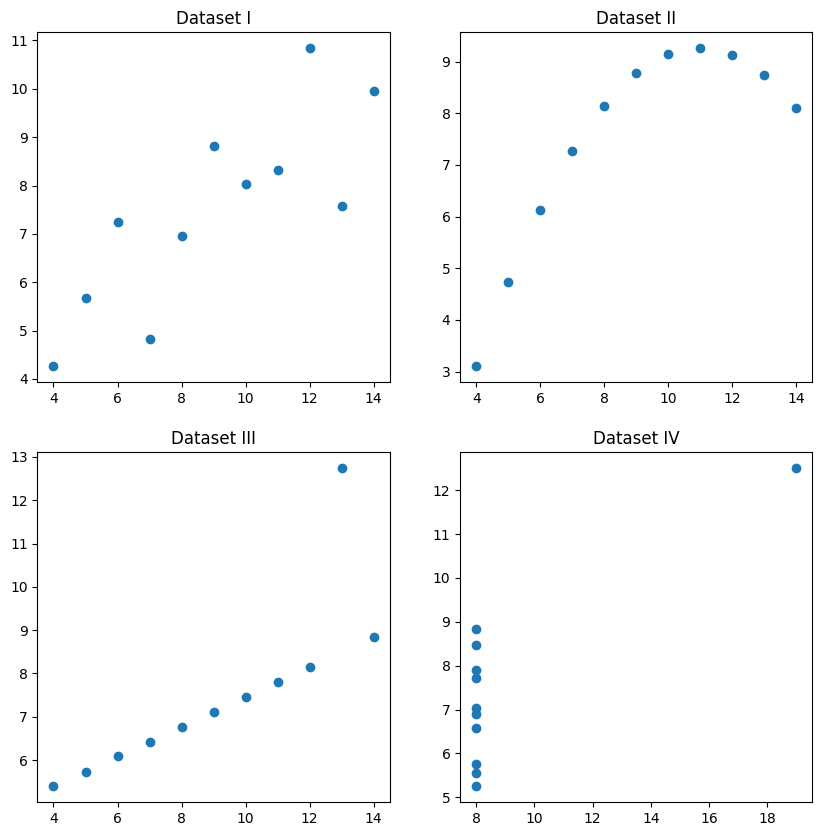

In [32]:
# Load in four different datasets: I, II, III, IV
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

anscombe = {
    'I': pd.DataFrame(list(zip(x, y1)), columns =['x', 'y']),
    'II': pd.DataFrame(list(zip(x, y2)), columns =['x', 'y']),
    'III': pd.DataFrame(list(zip(x, y3)), columns =['x', 'y']),
    'IV': pd.DataFrame(list(zip(x4, y4)), columns =['x', 'y'])
}

fig, axs = plt.subplots(2, 2, figsize = (10, 10))

for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    ans = anscombe[dataset]
    axs[i//2, i%2].scatter(ans['x'], ans['y'])
    axs[i//2, i%2].set_title(f"Dataset {dataset}")

plt.show()

>>> Dataset I:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.119


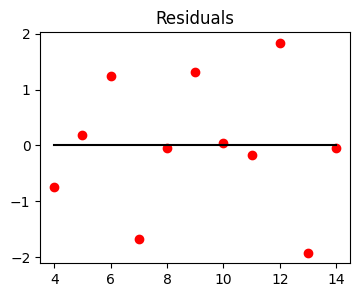



>>> Dataset II:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.119


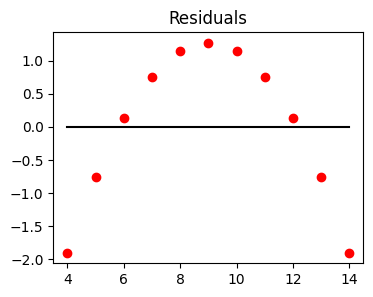



>>> Dataset III:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.118


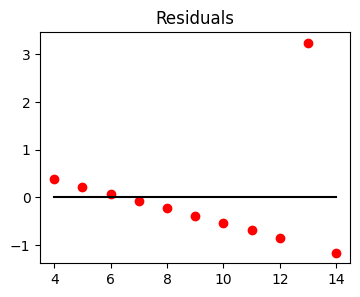



>>> Dataset IV:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.817
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.118


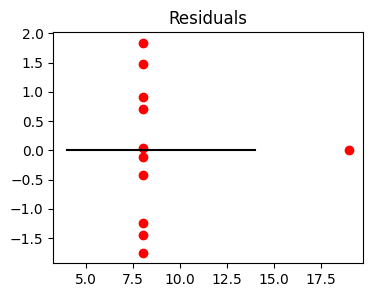

In [33]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[dataset]
    fig = least_squares_evaluation(ans['x'], ans['y'], visualize = RESID)
    plt.show(fig)
    print()
    print()

In [34]:
dugong.head()

,Length,Age
3,1.77,1.5
0,1.80,1.0
1,1.85,1.5
2,1.87,1.5
4,2.02,2.5


In [37]:
yobs = dugongs["Age"]      # The true observations y
xs = dugongs["Length"]     # Needed for linear predictions

theta_1_hat = np.corrcoef(xs, yobs)[0, 1] * np.std(yobs) / np.std(xs)
theta_0_hat = np.mean(yobs) - theta_1_hat * np.mean(xs)
yhats_linear = theta_0_hat + theta_1_hat * xs

np.corrcoef(xs, yobs)[0, 1]

0.8296474554905716

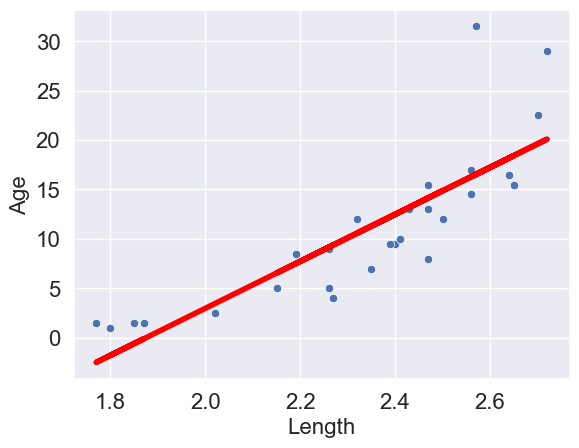

In [38]:
# In case we're in a weird style state
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, yhats_linear, color='red', lw=4)
# plt.savefig('dugong_line.png', bbox_inches = 'tight');
plt.show()


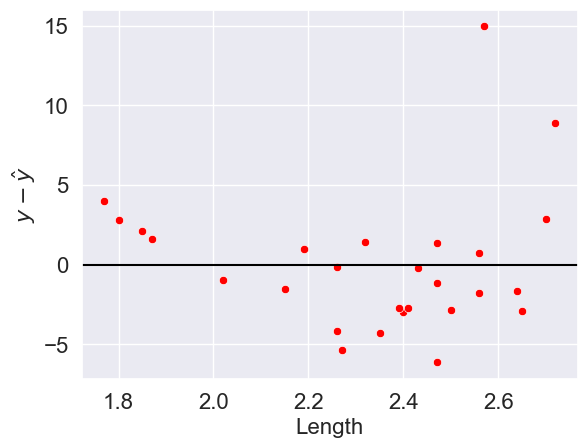

In [39]:
residuals = yobs - yhats_linear

sns.scatterplot(x=xs, y=residuals, color='red', lw=4)
plt.axhline(0, color='black')
plt.ylabel(r"$y - \hat{y}$")
# plt.savefig('dugong_residuals.png', bbox_inches = 'tight');
plt.show()

In [40]:
dugongs["Log(Age)"] = np.log(dugongs["Age"])
zobs = dugongs["Log(Age)"]      # The LOG of true observations y
xs = dugongs["Length"]     # Needed for linear predictions

ztheta_1_hat = np.corrcoef(xs, zobs)[0, 1] * np.std(zobs) / np.std(xs)
ztheta_0_hat = np.mean(zobs) - ztheta_1_hat * np.mean(xs)
zhats_linear = ztheta_0_hat + ztheta_1_hat * xs

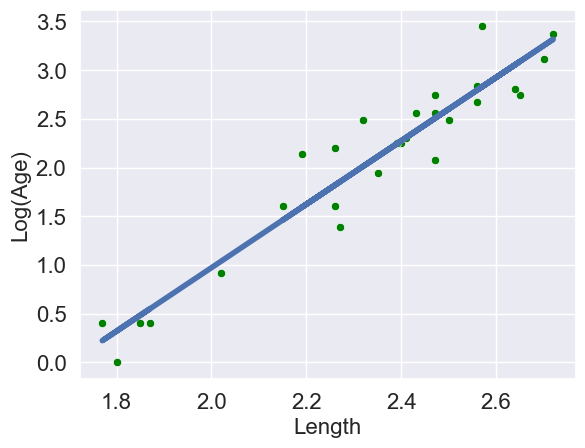

In [41]:
sns.scatterplot(x=xs, y=zobs, color='green')
plt.plot(xs, zhats_linear, lw=4)
# plt.savefig('dugong_zline.png', bbox_inches = 'tight');
plt.show()


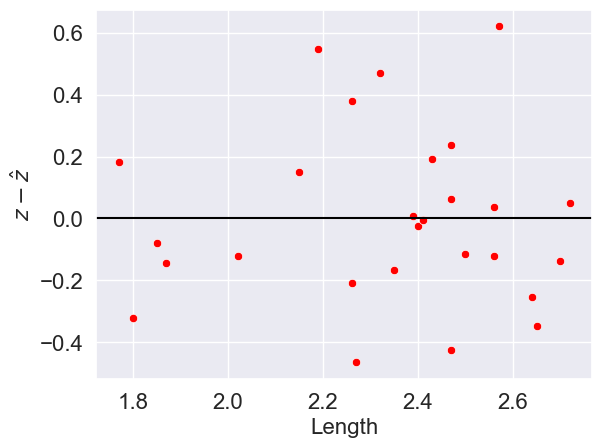

In [43]:
residuals = zobs - zhats_linear

sns.scatterplot(x=xs, y=residuals, color='red', lw=4)
plt.axhline(0, color='black')
plt.ylabel(r"$z - \hat{z}$")
# plt.savefig('dugong_residuals.png', bbox_inches = 'tight');
plt.show()

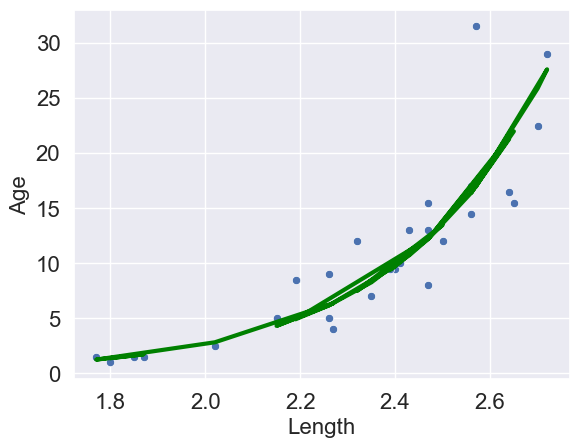

In [48]:
ypred = np.exp(zhats_linear)
sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, ypred, color='green', lw=3)
# plt.savefig('dugong_curve.png', bbox_inches = 'tight');
plt.show()